# Codeanywhere TensorFlow Template

Welcome to TensorFlow on Codeanywhere! This template is your springboard for creating amazing image classification projects. We'll use the classic MNIST digits dataset to get you started.

In this interactive notebook, you'll learn how to:

*   **Load a Dataset:** Grab MNIST and prepare it for our model.
*   **Build a Neural Network:** Create a simple but effective network to recognize handwritten digits.
*   **Train Your Model:** Teach your network to identify different digits with a training loop.
*   **Test It Out:** See your model in action by testing it on new images. How well does it perform?

Ready to become an AI engineer? Let's dive in!

The code is based on the [TensorFlow basic classification tutorial](https://www.tensorflow.org/tutorials/keras/classification). You can find more help on the links below:

[TensorFlow Basics](https://www.tensorflow.org/tutorials) ||
[Keras Guide](https://www.tensorflow.org/guide/keras) ||
[Tensors](https://www.tensorflow.org/guide/tensor) ||
[Datasets & Input Pipeline](https://www.tensorflow.org/guide/data) ||
[Data Preprocessing](https://www.tensorflow.org/guide/keras/preprocessing_layers) ||
**Build Model** ||
[Automatic Differentiation](https://www.tensorflow.org/guide/autodiff) ||
[Optimization](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) ||
[Save & Load Model](https://www.tensorflow.org/guide/keras/save_and_serialize)

# Building the Neural Network

Neural networks are made up of layers that perform operations on data. The [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras) API provides all the building blocks you need to create your own neural networks. Every layer in TensorFlow subclasses [tf.keras.layers.Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer). A neural network itself is a model consisting of other layers. This nested structure makes it easy to build and manage complex architectures.

In the following sections, we'll build a neural network to classify images in the MNIST dataset.

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import random

2025-02-27 11:58:42.781479: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 11:58:42.782296: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 11:58:42.785616: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 11:58:42.793508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740657522.807606    1524 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740657522.81

## Checking TensorFlow Version and GPU Availability
Let's check if we have a GPU available for training. TensorFlow will automatically use the GPU if it's available. Codeanywhere may not have GPU support, but we're always looking to improve. Keep an eye out for future updates!


In [3]:
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU devices:")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("Using CPU for training")

TensorFlow version: 2.18.0
GPU Available: False
Using CPU for training


2025-02-27 11:58:48.594081: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Defining Our Neural Network
We'll define our neural network using the Keras Sequential API, which allows us to stack layers one after another. This is ideal for straightforward architectures like the one we need for MNIST.

In [5]:
def create_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Convert 28x28 images to 784 pixel values
        keras.layers.Dense(512, activation='relu'),  # First dense layer with 512 neurons
        keras.layers.Dense(512, activation='relu'),  # Second dense layer with 512 neurons
        keras.layers.Dense(10)  # Output layer with 10 neurons (one per digit)
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

Let's create an instance of our model and print its structure.

In [6]:
model = create_model()
model.summary()

/home/jovyan/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

To use the model, we pass it input data. This executes a forward pass through the network, producing model predictions. Let's see what happens when we feed a random input:

In [7]:
X = tf.random.normal([1, 28, 28])
logits = model(X)
pred_probab = tf.nn.softmax(logits)
y_pred = tf.argmax(pred_probab, axis=1)
print(f"Predicted class: {y_pred.numpy()}")

Predicted class: [1]


## Let's dive deeper...

## Inside the Model Layers

Let's break down the layers in the MNIST model. To illustrate, we'll take a minibatch of 3 images of size 28x28 and see what happens as we pass it through the network.

In [8]:
input_image = tf.random.normal([3, 28, 28])
print(f"Input shape: {input_image.shape}")

Input shape: (3, 28, 28)


### Flatten Layer
We initialize the [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values. The batch dimension (at dim=0) is maintained.

In [9]:
flatten = keras.layers.Flatten()
flat_image = flatten(input_image)
print(f"After flatten: {flat_image.shape}")

After flatten: (3, 784)


### Dense Layer
The [Dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) is a fully connected neural network layer that applies a linear transformation on the input using its stored weights and biases, then applies an activation function.

In [10]:
layer1 = keras.layers.Dense(20, activation=None)  # No activation for now
hidden1 = layer1(flat_image)
print(f"After dense layer: {hidden1.shape}")

After dense layer: (3, 20)


### ReLU Activation
Non-linear activations create complex mappings between the model's inputs and outputs. They're applied after linear transformations to introduce *nonlinearity*, helping neural networks learn a wide variety of phenomena.

In this model, we use [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) between our dense layers, but there are other activations to introduce non-linearity in your model.

In [11]:
print(f"Before ReLU: {hidden1.numpy()[:2, :3]}\n")
relu = keras.activations.relu(hidden1)
print(f"After ReLU: {relu.numpy()[:2, :3]}")

Before ReLU: [[-0.09879903 -1.814381   -1.4603981 ]
 [-0.649222    0.70476043  2.4709082 ]]

After ReLU: [[0.         0.         0.        ]
 [0.         0.70476043 2.4709082 ]]


### Sequential Model
[Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) is an ordered container of layers. The data is passed through all the layers in the same order as defined. You can use sequential models to quickly assemble a network like `seq_model`.

In [12]:
seq_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(20),
    keras.layers.ReLU(),
    keras.layers.Dense(10)
])
input_image = tf.random.normal([3, 28, 28])
logits = seq_model(input_image)

### Softmax Activation
The last layer of our neural network returns `logits` - raw values in [-\infty, \infty] - which we pass to the [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) activation function. The logits are scaled to values [0, 1], representing the model's predicted probabilities for each class. The `axis` parameter indicates the dimension along which the values must sum to 1.

In [13]:
softmax = tf.nn.softmax(logits, axis=1)
pred_probab = softmax

## Model Parameters
Many layers inside a neural network are *parameterized*, meaning they have associated weights and biases that are optimized during training. In TensorFlow, all model parameters are accessible using your model's `trainable_variables` property.

In this example, we iterate over each parameter and print its shape and a preview of its values.

In [14]:
print(f"Model structure: {model}\n")

for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.__class__.__name__}")
    if layer.trainable_weights:
        for j, w in enumerate(layer.trainable_weights):
            print(f"  Weight/bias {j}: Shape = {w.shape} | Values = {w.numpy().flatten()[:3]} ...")
    else:
        print("  No trainable parameters")
    print()

Model structure: <Sequential name=sequential, built=True>

Layer 0: Flatten
  No trainable parameters

Layer 1: Dense
  Weight/bias 0: Shape = (784, 512) | Values = [ 0.04659762 -0.03009432 -0.05198447] ...
  Weight/bias 1: Shape = (512,) | Values = [0. 0. 0.] ...

Layer 2: Dense
  Weight/bias 0: Shape = (512, 512) | Values = [-0.02405534  0.05653851 -0.03336934] ...
  Weight/bias 1: Shape = (512,) | Values = [0. 0. 0.] ...

Layer 3: Dense
  Weight/bias 0: Shape = (512, 10) | Values = [-0.05442356  0.08846322 -0.00129733] ...
  Weight/bias 1: Shape = (10,) | Values = [0. 0. 0.] ...



## Training Time!
Now let's download and prepare the dataset:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


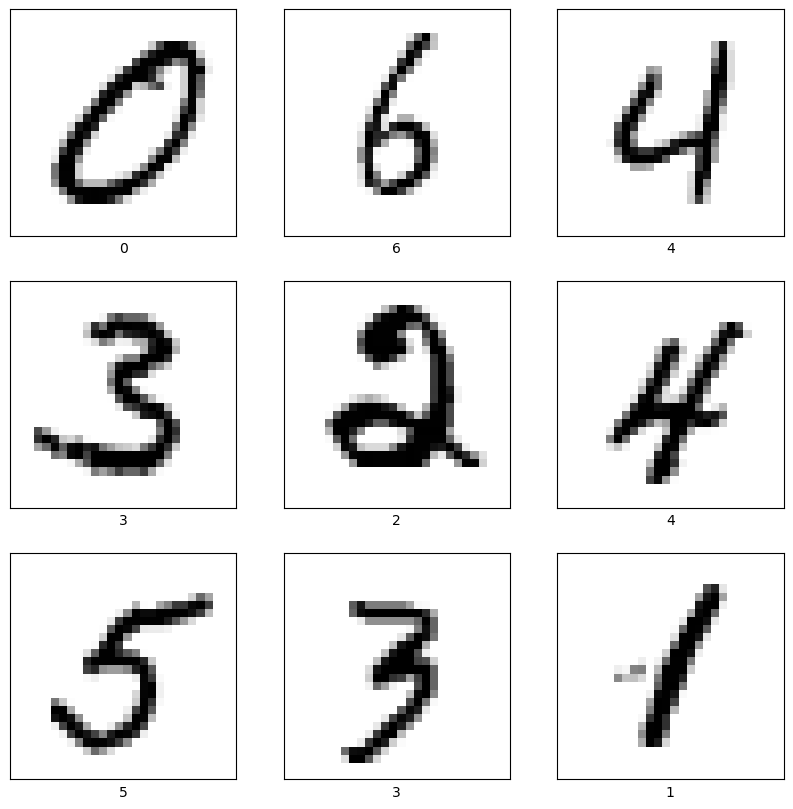

In [15]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

# Let's see a sample of the training data
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, len(train_images) - 1)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[index]])
plt.show()

## Run the Training


In [16]:
# Create the model
model = create_model()

# Define some training parameters
batch_size = 64  # Process 64 images at a time
epochs = 5       # Iterate through the entire dataset 5 times

# Train the model
history = model.fit(
    train_images, 
    train_labels, 
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1  # Use 10% of the training data for validation
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8910 - loss: 0.3608 - val_accuracy: 0.9732 - val_loss: 0.0946
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9743 - val_loss: 0.0826
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9773 - val_loss: 0.0762
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.9803 - val_loss: 0.0798
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9782 - val_loss: 0.0849


## Visualize Training Performance

Let's visualize how our model's accuracy and loss evolved during training.

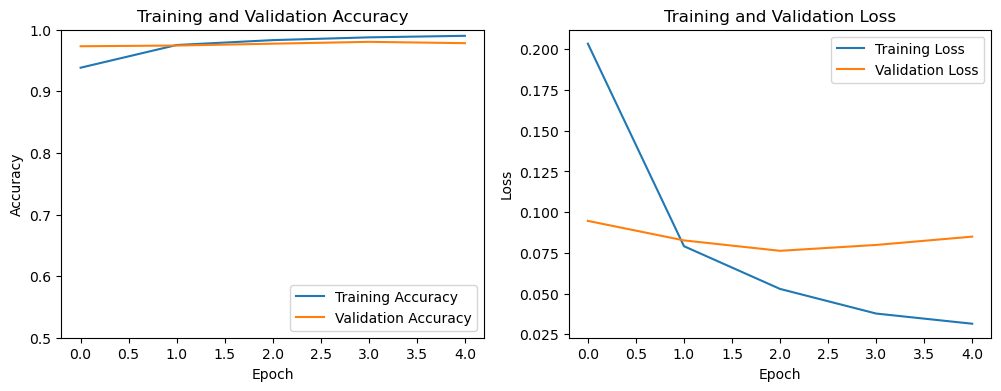

In [17]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## Evaluate the Model on Test Data


In [18]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9758 - loss: 0.0869

Test accuracy: 0.9758


## Seeing the Results (Inference)

Now that we have a trained model, let's see how it performs on some images from the test dataset. We'll create a function to make predictions and display the results.

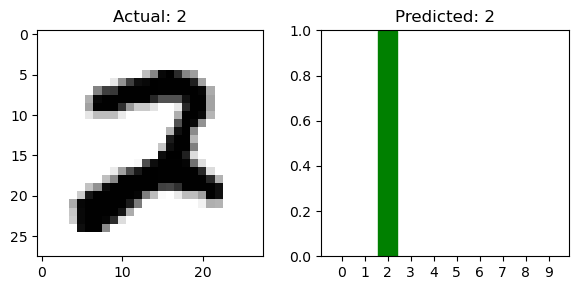

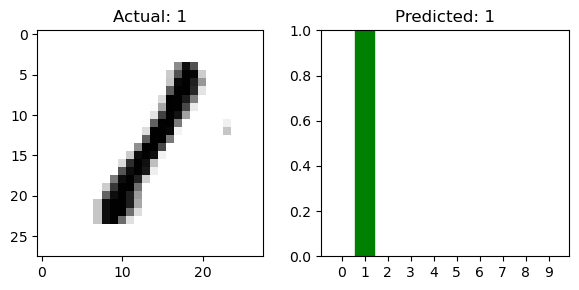

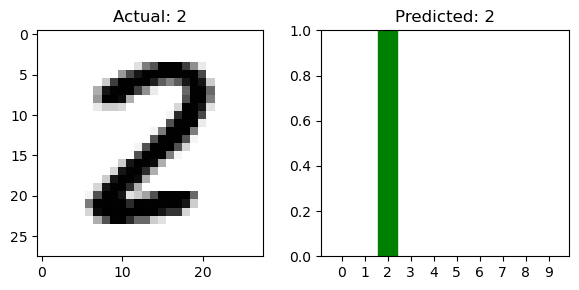

In [19]:
# Create a probability model by adding a softmax layer to our model
probability_model = keras.Sequential([
    model,
    keras.layers.Softmax()
])

# Function to predict and display results
def display_prediction(index):
    img = test_images[index]
    img_array = tf.expand_dims(img, 0)  # Create a batch with a single image
    
    # Get predictions
    predictions = probability_model(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    actual_class = test_labels[index]
    
    # Display the image and prediction results
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.grid(False)
    plt.title(f"Actual: {actual_class}")
    
    # Plot the prediction confidence for all classes
    plt.subplot(1, 2, 2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[0], color="#777777")
    plt.ylim([0, 1])
    plt.title(f"Predicted: {predicted_class}")
    
    # Highlight the predicted digit
    if predicted_class == actual_class:
        plot[predicted_class].set_color('green')
    else:
        plot[predicted_class].set_color('red')
        plot[actual_class].set_color('green')
    
    plt.tight_layout()
    plt.show()

# Display predictions for a few random test images
for _ in range(3):
    random_index = random.randint(0, len(test_images) - 1)
    display_prediction(random_index)

## Saving the Model (Persistence)

Let's save our trained model so we can use it later without retraining.

In [22]:
# Save the entire model (architecture + weights + optimizer state)
model.save('mnist_model.keras')
print("Saved TensorFlow Model to 'mnist_model' directory")

# Optionally, save just the weights
model.save_weights('mnist_weights.weights.h5')
print("Saved Model Weights to 'mnist_weights'")

Saved TensorFlow Model to 'mnist_model' directory
Saved Model Weights to 'mnist_weights'


## Loading a Saved Model

Here's how to load the model we just saved:

In [24]:
# Load the entire model
loaded_model = keras.models.load_model('mnist_model.keras')

# Verify that the model works
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy of loaded model: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9758 - loss: 0.0869

Test accuracy of loaded model: 0.9758


## Wrapping Up!

Congratulations! You've built and trained a digit classification model using TensorFlow and Codeanywhere. This is just the beginning. Experiment with different network architectures, training parameters, and datasets to create even more amazing AI applications!

Some ideas to try next:
1. Add more layers or neurons to improve accuracy
2. Try different optimizers like SGD or RMSprop
3. Add dropout layers to prevent overfitting
4. Try a convolutional neural network (CNN) architecture
5. Apply data augmentation to improve generalization

- [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras)
- [TensorFlow Tutorials](https://www.tensorflow.org/tutorials)